## Observations and Insights 

What I have observed through creating data frames is that Ramicane and Copomulin dont have a remarkable difference in treatment for overall mice. The sex of the mice didnt make a difference in the regimen. ALthough age did tend to make a drast transition in tumor volume amognst the males.The standard deviation of treatment varied but within the same mean for all regimens

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combination_df = pd.merge(mouse_metadata, study_results,how = 'outer', on = 'Mouse ID')
# Display the data table for preview
combination_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = combination_df['Mouse ID'].nunique()
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combination_df.loc[combination_df.duplicated(subset = ['Mouse ID', "Timepoint"]), 'Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_id = combination_df.loc[combination_df['Mouse ID'] == 'g989', :]
duplicate_mice_id


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combination_df[combination_df['Mouse ID'].isin(duplicate_mice)==False]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_data_mice = clean_data['Mouse ID'].nunique()
clean_data_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
variance_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem_stat = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean_stat, 
                            "Median Tumor Volume":median_stat, 
                           "Tumor Volume Variance":variance_stat, 
                           "Tumor Volume Std. Deviation.":std_stat, 
                           "Tumor Volume Std. Error.":sem_stat})
summary_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation.,Tumor Volume Std. Error.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_aggregation = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
#Create its own series for each "drug regimen"

count_df = clean_data['Drug Regimen'].value_counts()
count_df

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Mice Per Treatment')

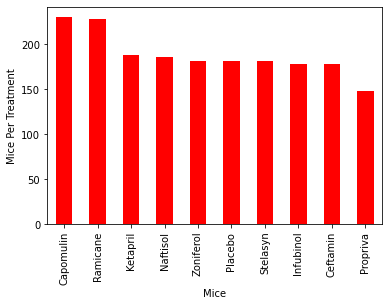

In [10]:
#Create pandas plot using group series above and adding labels

pandas_plot = count_df.plot.bar(color='r')  

# Give the chart a title, x label, and y label
plt.xlabel("Drug Regimen")
plt.xlabel("Mice")
plt.ylabel("Mice Per Treatment")

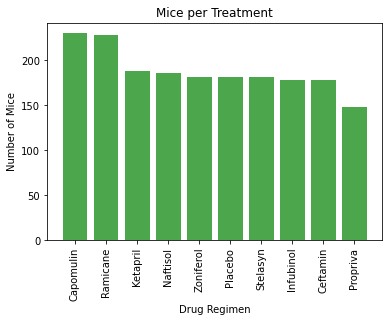

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = count_df.index.values
y_axis = count_df.values

# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.bar(x_axis, y_axis, color='g', alpha=0.7, align='center')

# Set the xlabel and ylabel, title using class methods

plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

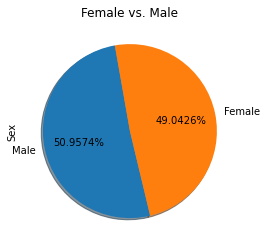

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas\
gender = clean_data['Sex'].value_counts()
plt.title ('Female vs. Male')
gender.plot.pie(autopct="%4.4f%%", shadow=True, startangle=100)
plt.show()


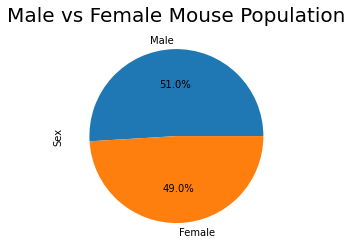

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

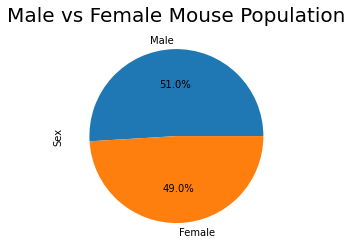

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.show()

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane= clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol= clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin= clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

In [36]:
# Start by getting the last (greatest) timepoint for each mouse
#Capomulin
Capomulin_last = Capomulin.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Capomulin_merge = pd.merge(Capomulin_volume, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [39]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Capomulin=clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane=clean_data.loc[clean_data["Drug Regimen"] == "Ramicane",:]
Infubinol= clean_data.loc[clean_data["Drug Regimen"] == "Infubinol",:]
Ceftamin=clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin",:]


# Start by getting the last (greatest) timepoint for each mouse
Capomulin_great = Capomulin.groupby("Mouse ID").max()["Timepoint"]
Capomulin_df = pd.DataFrame(Capomulin_great)
Ramicane_great = Ramicane.groupby("Mouse ID").max()["Timepoint"]
Ramicane_df = pd.DataFrame(Ramicane_great)
Infubinol_great = Infubinol.groupby("Mouse ID").max()["Timepoint"]
Infubinol_df = pd.DataFrame(Infubinol_great)
Ceftamin_great = Ceftamin.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_df = pd.DataFrame(Ceftamin_great)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
third_gd_merge = pd.merge(Capomulin_df,clean_data, on = ("Mouse ID","Timepoint"), how = "left")
third_gd_merge.head()
fourth_gd_merge = pd.merge(Ramicane_df,clean_data, on = ("Mouse ID","Timepoint"), how = "left")
fourth_gd_merge.head()
fifth_gd_merge = pd.merge(Infubinol_df,clean_data, on = ("Mouse ID","Timepoint"), how = "left")
fifth_gd_merge.head()
sixth_gd_merge = pd.merge(Ceftamin_df,clean_data, on = ("Mouse ID","Timepoint"), how = "left")
sixth_gd_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
data_for_plotting = [third_gd_merge, fourth_gd_merge, fifth_gd_merge, sixth_gd_merge]

Cap= third_gd_merge["Tumor Volume (mm3)"]
Ram= fourth_gd_merge["Tumor Volume (mm3)"]
Inf= fifth_gd_merge["Tumor Volume (mm3)"]
Cef= sixth_gd_merge["Tumor Volume (mm3)"]


plots = [Cap,Ram,Inf,Cef]



In [43]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(len(treatments)):
    tumors = (data_for_plotting[x])["Tumor Volume (mm3)"]
    quartiles =tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatments[x]} tumors is: {lowerq}")
    print(f"The upper quartile of {treatments[x]} tumors is: {upperq}")
    print(f"The interquartile range of {treatments[x]} tumors is: {iqr}")
    print(f"The median of {treatments[x]} tumors is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The median of Capomulin tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin tumors is: 48

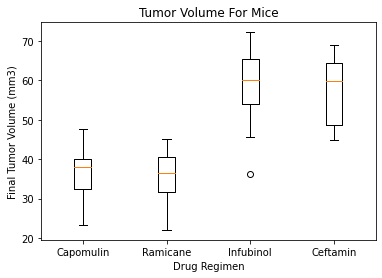

In [48]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume For Mice')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plots, labels=treatments, widths = 0.2, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

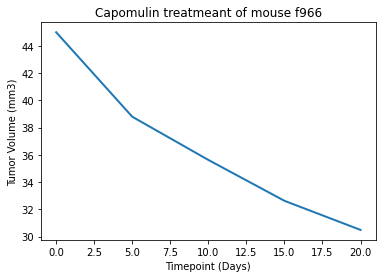

In [59]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = Capomulin.loc[Capomulin["Mouse ID"] == "f966",:]
line_df.head()
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse f966')
plt.plot(x_axis, y_axis,linewidth=2, markersize=15 ,label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

## Correlation and Regression